In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
torch.set_printoptions(edgeitems=2, threshold=50)

((720, 1280, 3), imageio.core.util.Array)

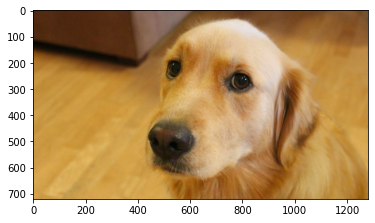

In [5]:
import imageio

img_arr = imageio.imread('../data/p1ch4/image-dog/bobby.jpg')
plt.imshow(img_arr)
img_arr.shape, type(img_arr)

In [3]:
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)

In [4]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

In [5]:
import os

data_dir = '../data/p1ch4/image-cats/'
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.png']
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3] # <1>
    batch[i] = img_t

In [6]:
batch = batch.float()
batch /= 255.0

In [7]:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std